## Exercice - Loi de Boyle: volume d'un gaz en fonction de sa pression... 

De nos cours de physique du secondaire, nous nous souvenons que si la pression double, le volume diminue d'un facteur deux... autrement dit, le volume est inversément proportionel à la pression ou encore

$PV = cste$

Voyons cela!

In [3]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np

In [4]:
input_df = pandas.read_csv('Boyle.txt',sep='\t')

In [5]:
input_df.head()

,Height,Pressure
0,48,29.1
1,46,30.6
2,44,31.9
3,42,33.2
4,40,35.3


Représentation graphique des données brutes:

Dans la suite, on renomera la colonne 'Height' en 'Volume' pour que la suite soit plus en ligne avec le langage habituel de la physique générale. On sait que dans l'expérience en question le volume est mesuré par la hauteur d'un cylindre mais, fondamentalement, c'est bien d'un volume de gaz dont on parle!!!

In [6]:
input_df.rename(columns={'Height':'Volume', 'Pressure':'Pression'}, inplace=True)

In [7]:
input_df.head()

,Volume,Pression
0,48,29.1
1,46,30.6
2,44,31.9
3,42,33.2
4,40,35.3


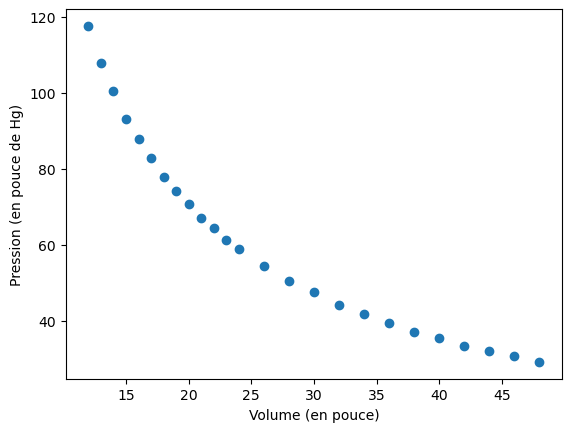

In [8]:
plt.plot(input_df['Volume'],input_df['Pression'],'o')
plt.xlabel('Volume (en pouce)')
plt.ylabel('Pression (en pouce de Hg)')
plt.show()

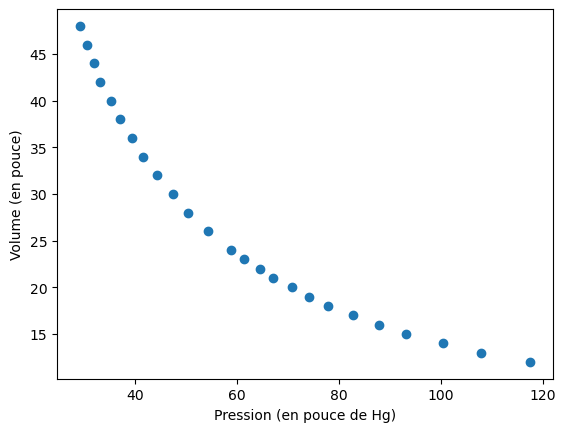

In [9]:
plt.plot(input_df['Pression'],input_df['Volume'],'o')
plt.ylabel('Volume (en pouce)')
plt.xlabel('Pression (en pouce de Hg)')
plt.show()

In [10]:
input_df['ln Pression'] = np.log(input_df['Pression'])
input_df['ln Volume'] = np.log(input_df['Volume'])

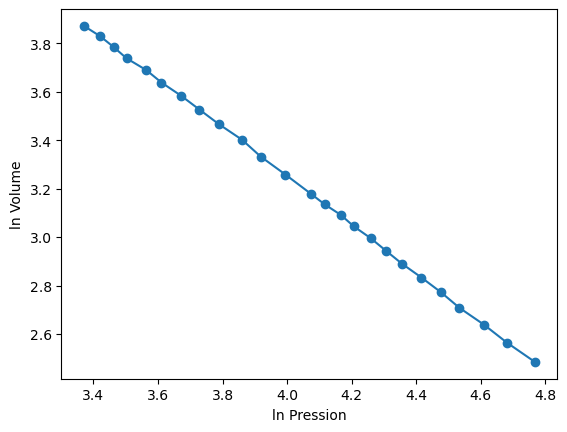

In [11]:
plt.plot(input_df['ln Pression'], input_df['ln Volume'], '-o')
plt.xlabel('ln Pression')
plt.ylabel('ln Volume')
plt.show()

In [12]:
input_df

,Volume,Pression,ln Pression,ln Volume
0,48,29.10,3.370738,3.871201
1,46,30.60,3.421000,3.828641
2,44,31.90,3.462606,3.784190
3,42,33.20,3.502550,3.737670
4,40,35.30,3.563883,3.688879
5,38,37.00,3.610918,3.637586
6,36,39.30,3.671225,3.583519
7,34,41.60,3.728100,3.526361
8,32,44.20,3.788725,3.465736
9,30,47.50,3.860730,3.401197


In [13]:
input_df[['ln Pression','ln Volume']].cov()

,ln Pression,ln Volume
ln Pression,0.179796,-0.179842
ln Volume,-0.179842,0.179912


Même si on sait déjà que ce n'est certainement pas la solution optimale, voyons ce qu'une explication linéaire
du volume en fonction de la pression pourrait donner:

In [14]:
A = input_df[['ln Pression','ln Volume']].cov()['ln Pression']['ln Volume']/input_df[['ln Pression','ln Volume']].cov()['ln Pression']['ln Pression']
B = input_df['ln Volume'].mean() - A*input_df['ln Pression'].mean()
                                                                                                                                       
A, B                                                                                                                                       

(-1.0002547125700327, 7.251235226214278)

In [15]:
input_df['Modèle linéaire (ln Volume vs ln Pression)'] = A*input_df['ln Pression'] + B

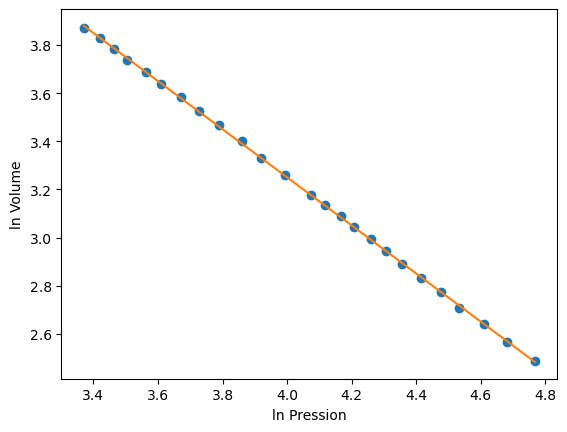

In [16]:
plt.plot(input_df['ln Pression'], input_df['ln Volume'], 'o')
plt.plot(input_df['ln Pression'], input_df['Modèle linéaire (ln Volume vs ln Pression)'], '-')
plt.xlabel('ln Pression')
plt.ylabel('ln Volume')
plt.show()

On voit donc que le modèle linéaire
$$ln(Volume) = A*ln(Pression) + B$$
rend bien compte des données expérimentales.

Revenons dans l'espace de départ, en inversant les logarithmes:

$$e^{ln{Volume}} = e^{A ln{Pression}+B}$$.

Nous aurons successivement:

$Volume = Pression^{A} e^{B}$ ou encore, en disant que $e^{B}=cste$

$Volume = Cste Pression^{A}$ avec $A=-1.0002...$ ou disons $-1$, on retrouve bien:

$Volume = \frac{Cste}{Pression}$ ou encore

$Volume Pression = Cste$ ou finalement

$Pression Volume = Cste$ où nous pouvons donner une estimation de la constante, $Cste=e^{B}=e^{7.25...}=1409.84...$

In [17]:
np.exp(B)

1409.8452508998762

Revenons aux données expérimentales et transformons le fit linéaire en revenant à l'espace orginal:

In [18]:
input_df['Modèle non linéaire (Volume vs Pression)'] = np.exp(input_df['Modèle linéaire (ln Volume vs ln Pression)'])

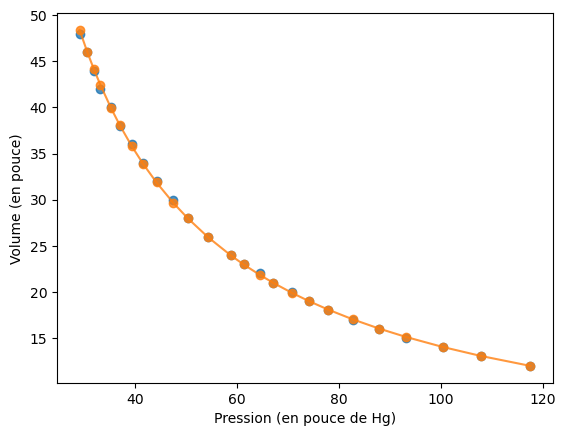

In [19]:
plt.plot(input_df['Pression'],input_df['Volume'],'o',alpha=0.8)
plt.plot(input_df['Pression'],input_df['Modèle non linéaire (Volume vs Pression)'],'-o',alpha=0.8)
plt.ylabel('Volume (en pouce)')
plt.xlabel('Pression (en pouce de Hg)')
plt.show()

Qui nous donne un fit quasi-parfait à l'échelle du graphe...

Ainsi, nous pouvons confirmer que :
$$P V = cste $$
et nous pouvons même donner une estimation de la valeur de cette constante:
$$1409.84$$ dans les unités de l'expérience.

Représentons les résidus de ce modèle non linéaire:

In [20]:
input_df['Résidu Modèle non linéaire (Volume vs Pression)'] = input_df['Modèle non linéaire (Volume vs Pression)'] - input_df['Volume']

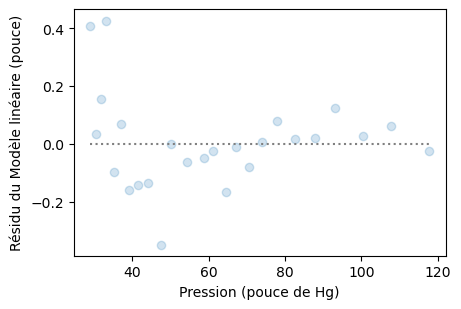

In [21]:
fac = 0.8
plt.rcParams["figure.figsize"] = (fac*6,fac*4)
plt.plot(input_df['Pression'], input_df['Résidu Modèle non linéaire (Volume vs Pression)'], 'o', alpha=0.2)
plt.hlines(y=0, xmin=np.min(input_df['Pression']), xmax=np.max(input_df['Pression']), linestyles='dotted', color='grey')
plt.xlabel('Pression (pouce de Hg)')
plt.ylabel('Résidu du Modèle linéaire (pouce)')
plt.show()

On voit que la distribution des résidus est maintenant plus aléatoire et centrée sur zéro... et ce, même si il y a 
encore quelque chose à dire par rapport à l'amplitude des résidus qui semble plus élevée pour les basses pressions...

Comme pour l'exercice 9.1, maintenant que vous avez la valeur des paramètres du modèle non linéaire, vous pouvez calculer directement 
les valeurs du volume au delà du range de pression des données.


Je vous invite à créer un graphe des valeurs du modèle dans l'intervalle de pression [10,150] en pouce de Hg

In [24]:
interpolate_df = pandas.DataFrame()
interpolate_df['Pression'] = np.linspace(10, 150)
interpolate_df['Volume'] = interpolate_df.apply(lambda r:1409.84/r['Pression'], axis=1)

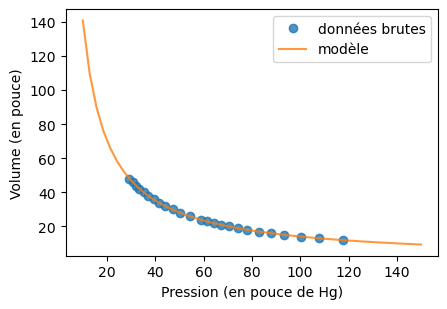

In [28]:
plt.plot(input_df['Pression'], input_df['Volume'], 'o', alpha=0.8, label='données brutes')
plt.plot(interpolate_df['Pression'], interpolate_df['Volume'],'-',alpha=0.8, label='modèle')
plt.ylabel('Volume (en pouce)')
plt.xlabel('Pression (en pouce de Hg)')
plt.legend()
plt.show()